In [14]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})

folder = '../data'
merge_file = 'pilot1'
plot_folder = '../plots/pilot1'

df =pd.read_csv(os.path.join(folder, f'{merge_file}_player_round_slim.csv'))
print(len(df))

3092


<AxesSubplot:xlabel='contribution', ylabel='count'>

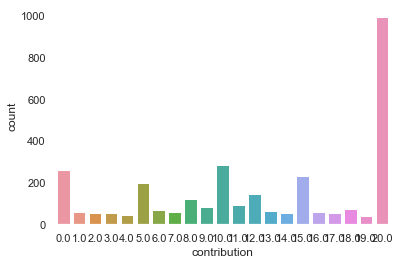

In [15]:
sns.countplot(data=df, x='contribution')

<AxesSubplot:xlabel='punishment', ylabel='count'>

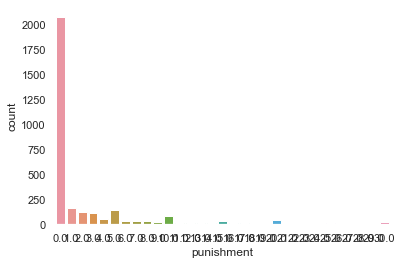

In [16]:
sns.countplot(data=df, x='punishment')